<a href="https://colab.research.google.com/github/balajiboopal/EV-Charging-Station/blob/main/EV_charging_station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/Electric_Vehicle_Charging_Station_Data_-8671638762898357044.csv')

# Calculate and display percentiles for all numerical columns
percentiles = df.describe(percentiles=[.25, .5, .75])
print("Percentiles for dataset:")
print(percentiles)

# Check for and display null values in each column
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)


Percentiles for dataset:
       Zip_Postal_Code   Energy__kWh_  GHG_Savings__kg_  \
count    148136.000000  148136.000000     148136.000000   
mean      80302.583045       8.456551          5.300949   
std           1.119734       8.873097          5.988745   
min       80301.000000       0.000000          0.000000   
25%       80302.000000       2.803750          1.588000   
50%       80302.000000       6.217000          3.698000   
75%       80303.000000      11.391000          6.922000   
max       80305.000000      92.691000         65.811000   

       Gasoline_Savings__gallons_       ObjectID      ObjectId2  
count               148136.000000  148136.000000  148136.000000  
mean                     1.061298   37134.811471   74068.500000  
std                      1.113573   21556.186954   42763.324076  
min                      0.000000       0.000000       1.000000  
25%                      0.352000   18516.750000   37034.750000  
50%                      0.780000   37033.50000

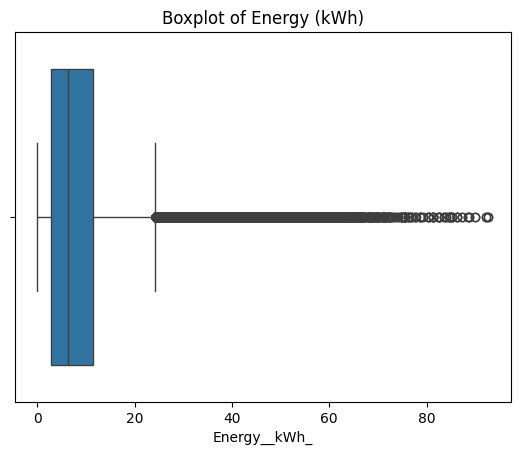

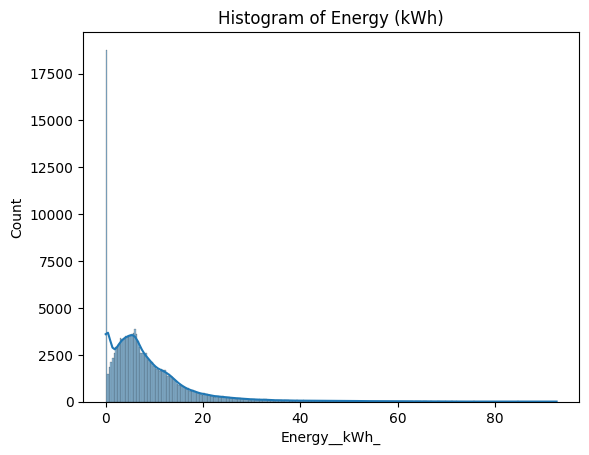

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Energy (kWh)
sns.boxplot(x=df['Energy__kWh_'])
plt.title('Boxplot of Energy (kWh)')
plt.show()

# Histogram for Energy (kWh)
sns.histplot(df['Energy__kWh_'], kde=True)
plt.title('Histogram of Energy (kWh)')
plt.show()


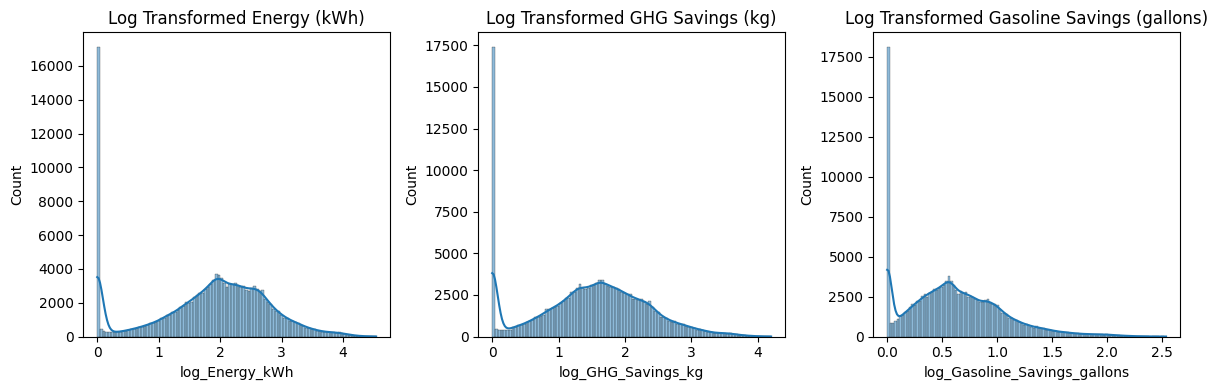

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/Electric_Vehicle_Charging_Station_Data_-8671638762898357044.csv')

# Adding a small constant because the log of zero is undefined
df['log_Energy_kWh'] = np.log(df['Energy__kWh_'] + 1)
df['log_GHG_Savings_kg'] = np.log(df['GHG_Savings__kg_'] + 1)
df['log_Gasoline_Savings_gallons'] = np.log(df['Gasoline_Savings__gallons_'] + 1)

# Plotting histograms of the log-transformed data to examine their distributions
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(df['log_Energy_kWh'], kde=True)
plt.title('Log Transformed Energy (kWh)')

plt.subplot(132)
sns.histplot(df['log_GHG_Savings_kg'], kde=True)
plt.title('Log Transformed GHG Savings (kg)')

plt.subplot(133)
sns.histplot(df['log_Gasoline_Savings_gallons'], kde=True)
plt.title('Log Transformed Gasoline Savings (gallons)')

plt.tight_layout()
plt.show()


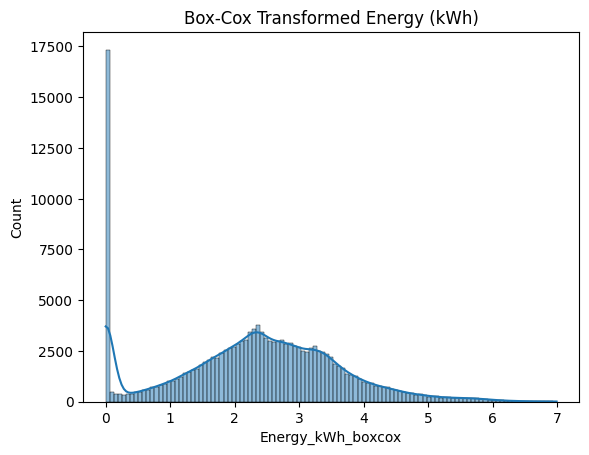

In [ ]:
from scipy import stats

# Assuming your DataFrame is named df and columns have been added a small constant to ensure positivity
# You might need to add 1 to each value if there are zero values in your data as Box-Cox cannot handle zeros.
df['Energy__kWh_'] += 1
df['GHG_Savings__kg_'] += 1
df['Gasoline_Savings__gallons_'] += 1

# Apply Box-Cox Transformation
df['Energy_kWh_boxcox'], _ = stats.boxcox(df['Energy__kWh_'])
df['GHG_Savings_kg_boxcox'], _ = stats.boxcox(df['GHG_Savings__kg_'])
df['Gasoline_Savings_gallons_boxcox'], _ = stats.boxcox(df['Gasoline_Savings__gallons_'])

# Plot to check new distributions
sns.histplot(df['Energy_kWh_boxcox'], kde=True)
plt.title('Box-Cox Transformed Energy (kWh)')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Load data
df = pd.read_csv('/content/Electric_Vehicle_Charging_Station_Data_-8671638762898357044.csv')

# Selecting columns to normalize
features = ['Energy__kWh_', 'GHG_Savings__kg_', 'Gasoline_Savings__gallons_']

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Applying Min-Max Scaling
df_min_max_scaled = min_max_scaler.fit_transform(df[features])
df_min_max_scaled = pd.DataFrame(df_min_max_scaled, columns=features)

# Applying Standard Scaling
df_standard_scaled = standard_scaler.fit_transform(df[features])
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=features)

# Optional: Replace original columns in df with scaled columns if you want to use df directly
df[features] = df_standard_scaled[features]

# Display the first few rows of the scaled data
print(df_min_max_scaled.head())
print(df_standard_scaled.head())


   Energy__kWh_  GHG_Savings__kg_  Gasoline_Savings__gallons_
0      0.070169          0.041513                    0.070145
1      0.026766          0.015833                    0.026734
2      0.162324          0.096017                    0.162297
3      0.074948          0.044339                    0.074959
4      0.019419          0.011487                    0.019427
   Energy__kWh_  GHG_Savings__kg_  Gasoline_Savings__gallons_
0     -0.220054         -0.428964                   -0.220281
1     -0.673448         -0.711161                   -0.673778
2      0.742635          0.169995                    0.742389
3     -0.170127         -0.397906                   -0.169992
4     -0.750197         -0.758918                   -0.750109


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load data
df = pd.read_csv('/content/Electric_Vehicle_Charging_Station_Data_-8671638762898357044.csv')

# Function to handle multiple date formats
def parse_dates(x):
    for fmt in ("%m/%d/%Y %H:%M", "%Y-%m-%d %H:%M:%S", "%d-%m-%Y %H:%M"):
        try:
            return pd.to_datetime(x, format=fmt)
        except ValueError:
            continue
    raise ValueError('no valid date format found')

# Apply the function to the 'Start_Date___Time' column
df['Start_Date___Time'] = df['Start_Date___Time'].apply(parse_dates)

# Set the parsed column as the index
df.set_index('Start_Date___Time', inplace=True)

# Assuming 'Energy__kWh_' as the target variable for forecasting
# Resample data by day and sum up energy usage for each day
data = df['Energy__kWh_'].resample('D').sum()

# Normalize the data using Min-Max Scaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# Split data into training and testing sets
split_idx = int(len(data_scaled) * 0.8)
train, test = data_scaled[:split_idx], data_scaled[split_idx:]

# Data is now ready for further analysis or model building


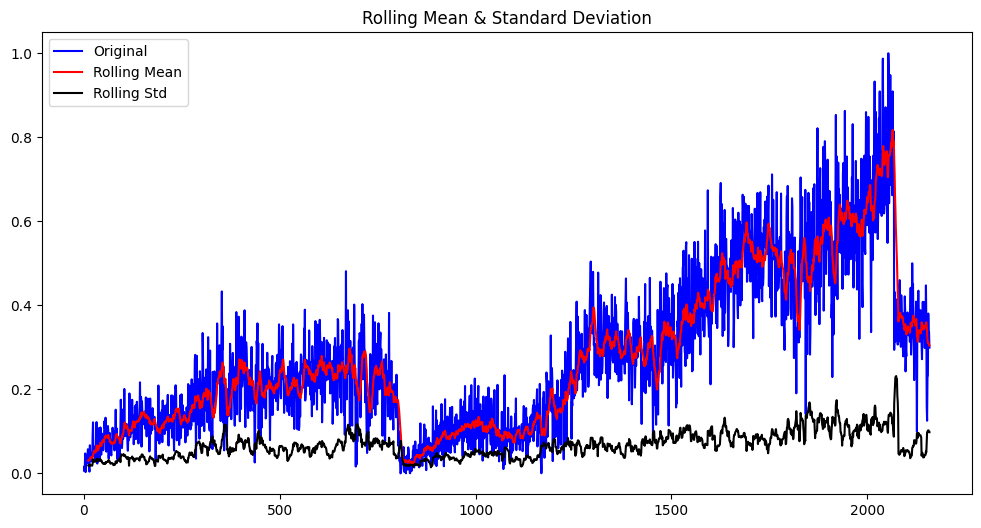

Results of Dickey-Fuller Test:
Test Statistic                   -1.745850
p-value                           0.407657
#Lags Used                       26.000000
Number of Observations Used    2133.000000
Critical Value (1%)              -3.433419
Critical Value (5%)              -2.862896
Critical Value (10%)             -2.567492
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Function to perform the ADF test on the time series
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics:
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Assuming 'data' is your time series column after resampling and dropping NA if any
data = pd.DataFrame(data_scaled, columns=['Energy__kWh_'])
data.dropna(inplace=True)
test_stationarity(data['Energy__kWh_'])


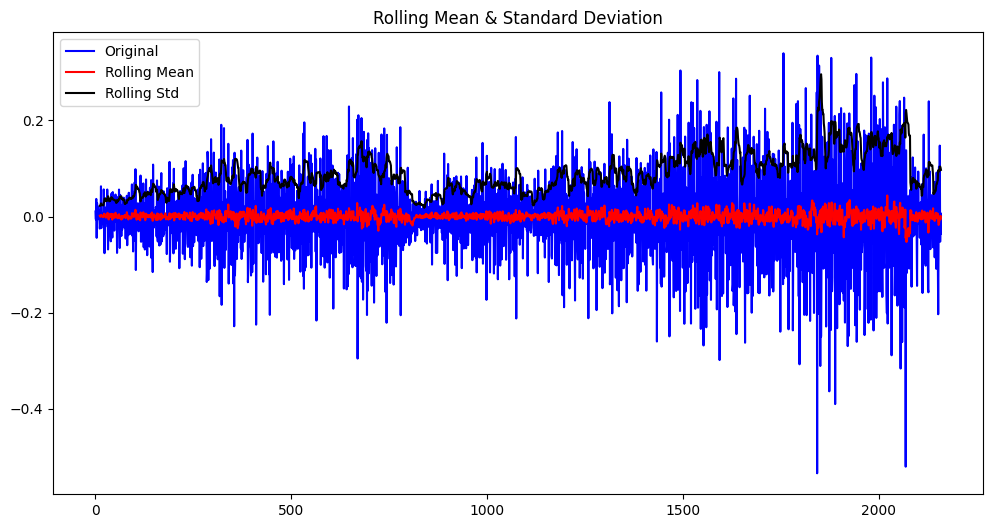

Results of Dickey-Fuller Test:
Test Statistic                -1.406007e+01
p-value                        3.067656e-26
#Lags Used                     2.600000e+01
Number of Observations Used    2.132000e+03
Critical Value (1%)           -3.433421e+00
Critical Value (5%)           -2.862897e+00
Critical Value (10%)          -2.567492e+00
dtype: float64
Results of Dickey-Fuller Test on Differenced Data:
Test Statistic                -1.406007e+01
p-value                        3.067656e-26
#Lags Used                     2.600000e+01
Number of Observations Used    2.132000e+03
Critical Value (1%)           -3.433421e+00
Critical Value (5%)           -2.862897e+00
Critical Value (10%)          -2.567492e+00
dtype: float64


In [ ]:
# Applying first differencing
data_diff = data['Energy__kWh_'].diff().dropna()

# Check stationarity of the differenced data
test_stationarity(data_diff)

# ADF test on differenced data
result_diff = adfuller(data_diff)
print('Results of Dickey-Fuller Test on Differenced Data:')
dfoutput_diff = pd.Series(result_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in result_diff[4].items():
    dfoutput_diff['Critical Value (%s)' % key] = value
print(dfoutput_diff)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:           Energy__kWh_   No. Observations:                 2159
Model:                 ARIMA(2, 0, 2)   Log Likelihood                2469.042
Date:                Sun, 19 May 2024   AIC                          -4926.084
Time:                        13:12:54   BIC                          -4892.019
Sample:                             0   HQIC                         -4913.624
                               - 2159                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.532      0.595      -0.000       0.001
ar.L1         -0.3887      0.470     -0.828      0.408      -1.309       0.532
ar.L2          0.1212      0.075      1.618      0.1

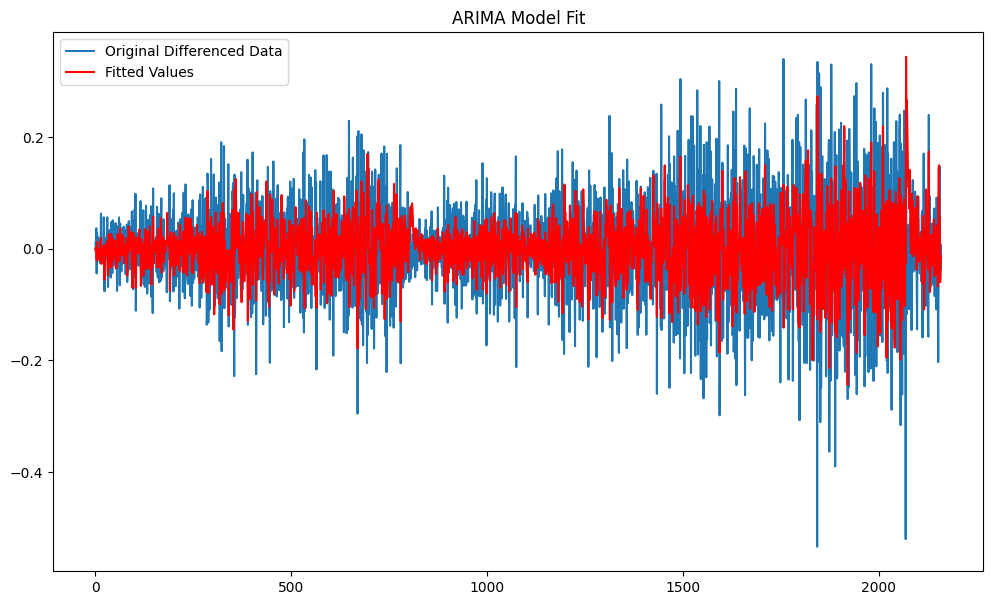

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming p=2, d=0, q=2 for the differenced data
model = ARIMA(data_diff, order=(2, 0, 2))
results = model.fit()

# Summary of the model
print(results.summary())

# Plot the fitted results
plt.figure(figsize=(12, 7))
plt.plot(data_diff, label='Original Differenced Data')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


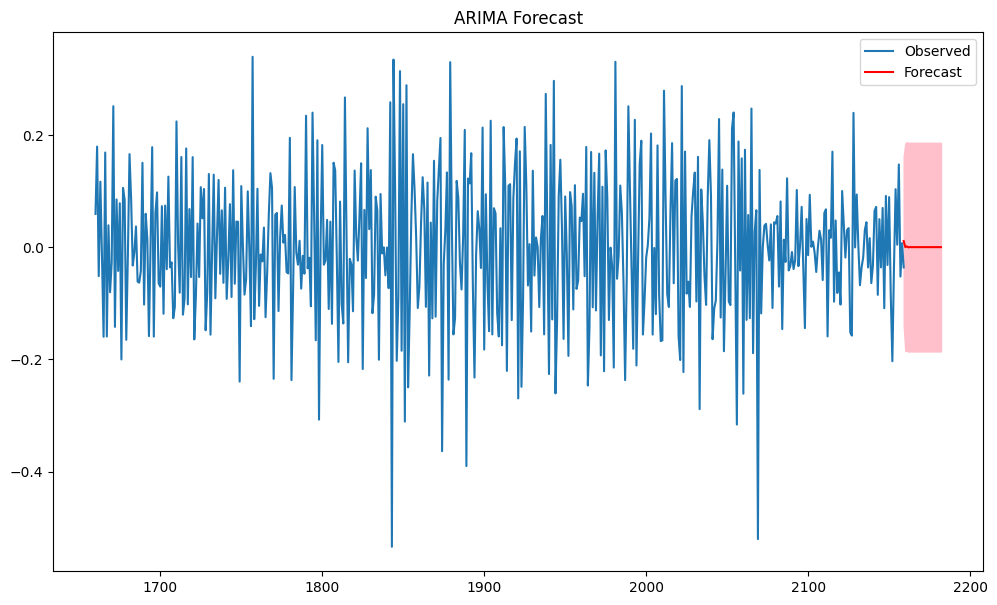

In [ ]:
# Forecast the next 24 periods
forecast = results.get_forecast(steps=24)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast along with the confidence intervals
plt.figure(figsize=(12, 7))
plt.plot(data_diff.index[-500:], data_diff[-500:], label='Observed')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='Forecast')
plt.fill_between(mean_forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


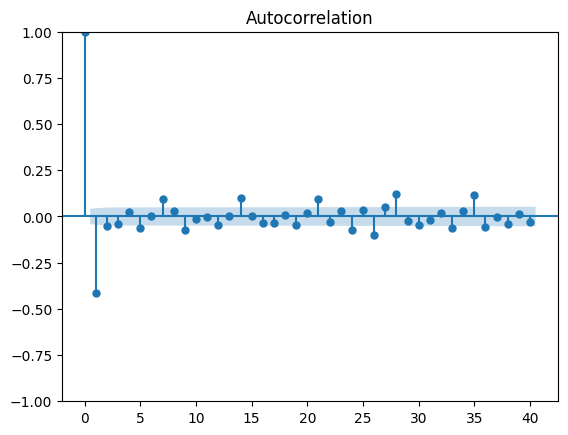

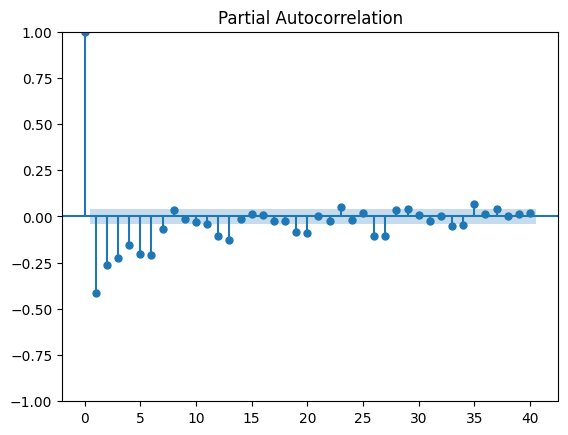

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Energy__kWh_   No. Observations:                 2159
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2468.444
Date:                Sun, 19 May 2024   AIC                          -4928.888
Time:                        13:13:04   BIC                          -4906.178
Sample:                             0   HQIC                         -4920.581
                               - 2159                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.539      0.590      -0.000       0.001
ar.L1          0.1739      0.020      8.569      0.000       0.134       0.214
ma.L1         -0.8794      0.010    -85.471      0.0

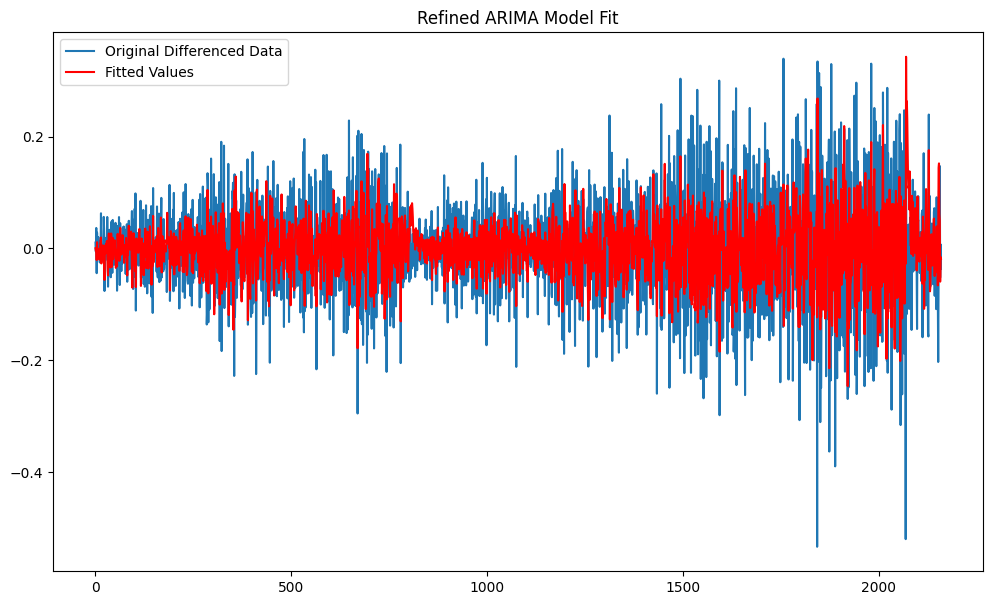

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plot_acf(data_diff, lags=40)
plot_pacf(data_diff, lags=40, method='ols')
plt.show()

# Try a different ARIMA configuration based on the plots
model = ARIMA(data_diff, order=(1, 0, 1))  # Adjust based on new insights
results = model.fit()
print(results.summary())

# Visualize the fitted results again
plt.figure(figsize=(12, 7))
plt.plot(data_diff, label='Original Differenced Data')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.title('Refined ARIMA Model Fit')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


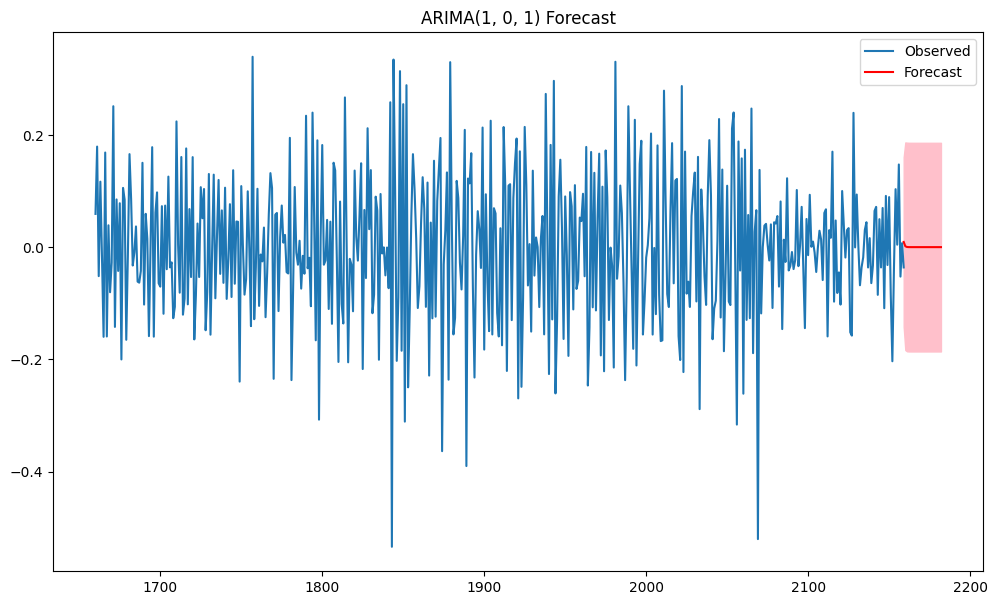

In [ ]:
# Forecasting the next 24 periods
forecast = results.get_forecast(steps=24)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast along with the confidence intervals
plt.figure(figsize=(12, 7))
plt.plot(data_diff.index[-500:], data_diff[-500:], label='Observed')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='Forecast')
plt.fill_between(mean_forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink')
plt.title('ARIMA(1, 0, 1) Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

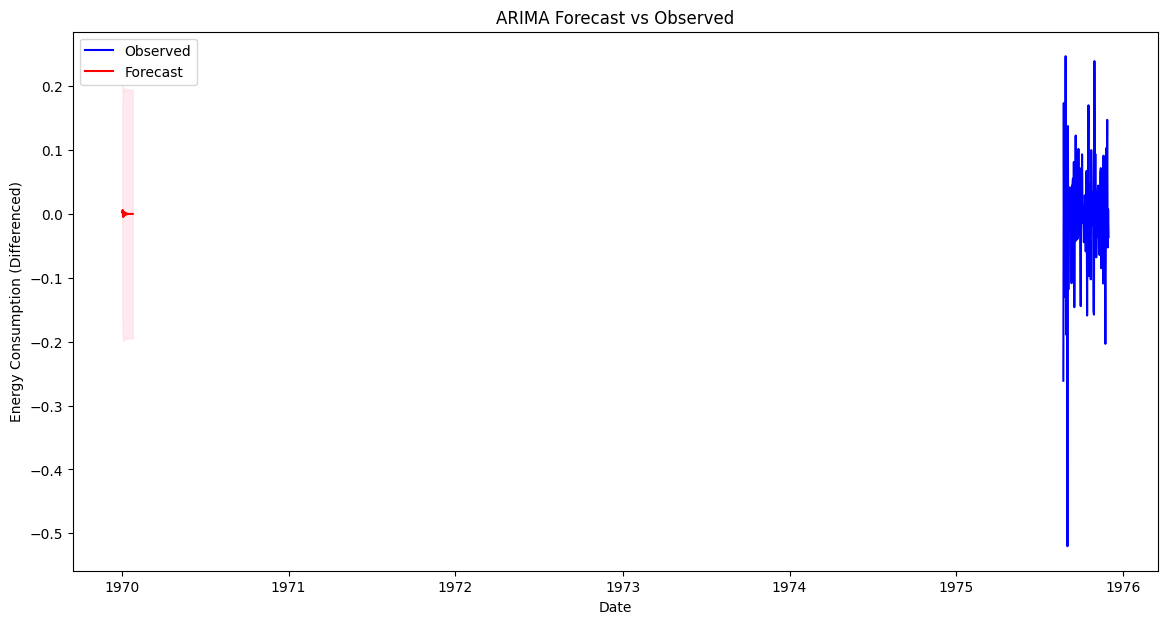

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Fit an ARIMA model (considering a more complex model based on your data's characteristics)
model = ARIMA(data_diff, order=(1, 0, 2))  # Adjust the order based on diagnostic checks
results = model.fit()

# Forecast the next 24 periods
forecast = results.get_forecast(steps=24)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

# Prepare the observed data for plotting
observed = data_diff[-100:]  # Last 100 points for context
forecast_index = pd.date_range(start=observed.index[-1], periods=25, freq='D')[1:]  # Generate future dates

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(observed.index, observed, label='Observed', color='blue')  # Observed data
plt.plot(forecast_index, mean_forecast, label='Forecast', color='red')  # Forecasted data
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)  # Confidence intervals
plt.title('ARIMA Forecast vs Observed')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Differenced)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


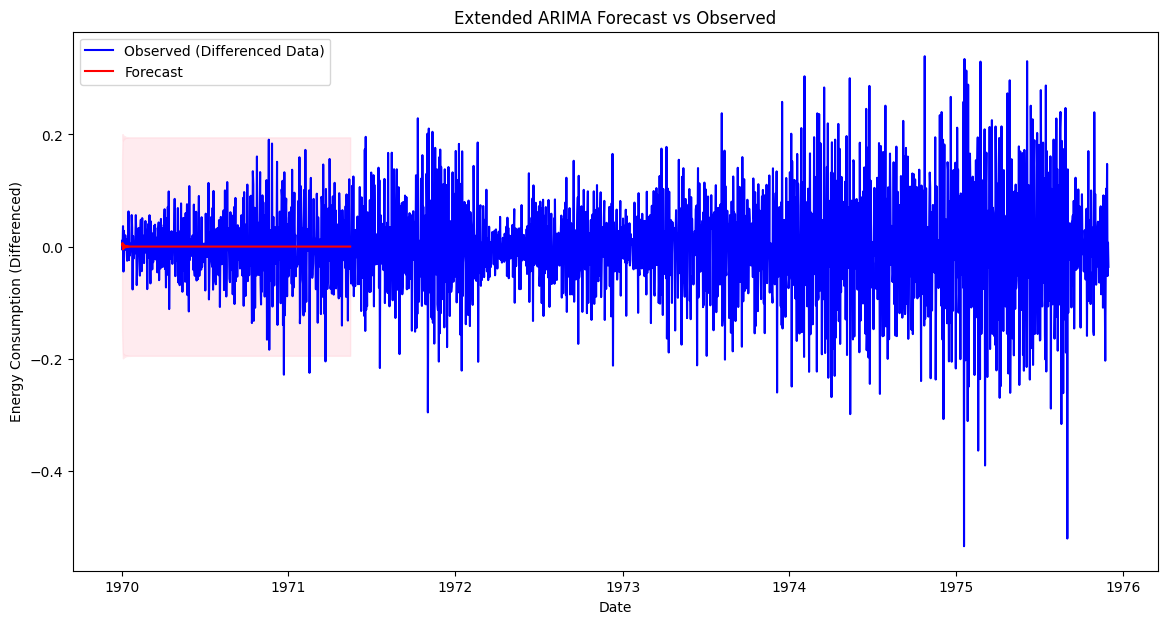

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'results' is your fitted ARIMA model
# Forecasting a larger number of steps to extend the forecast on the graph
forecast = results.get_forecast(steps=500)  # Adjust steps according to your needs
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

# Generating a date range for the forecasts if not inherently timestamped
last_date = observed.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=501, freq='D')[1:]

# Plotting the observed and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(data_diff.index, data_diff, label='Observed (Differenced Data)', color='blue')
plt.plot(forecast_dates, mean_forecast, label='Forecast', color='red')
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Extended ARIMA Forecast vs Observed')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Differenced)')
plt.legend()
plt.show()
